# Información y Programación Financiera, TI, Algoritmos y Ciencia de Datos

Neftalí Valdez

<a href="http://twitter.com/neftalivldz" target="_blank">@neftalivldz</a> | <a href="mailto:nvaldez@tec.mx">nvaldez@tec.mx</a>

# Importar librerías

In [11]:
!pip3 install TA-Lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.0/272.0 kB 1.5 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for TA-Lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build/lib.macosx-11.0-arm64-cpython-38
      creating build/lib.macosx-11.0-arm64-cpython-38/talib
      copying talib/abstract.py -> build/lib.macosx-11.0-arm64-cpython-38/talib
      copying talib/test_polars.py -> build/lib.macosx-11.0-arm64-cpython-38/talib
      copying talib/test_abstract.py -> build/lib.macosx-11.0-arm64-cpython-38/talib
      copying talib/deprecated.py -> build/lib.macosx-11.0-arm64-cpython-38/talib
      copying talib/__init__.

In [12]:
import eikon as ek  # the Eikon Python wrapper package
import numpy as np  # NumPy
import pandas as pd  # pandas
import cufflinks as cf  # Cufflinks
import configparser as cp
cf.set_config_file(offline=True)  # set the plotting mode to offline

from pathlib import Path
import pandas_datareader.data as web

import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.preprocessing import scale
import talib

import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'talib'

In [5]:
cfg = cp.ConfigParser()
cfg.read('../refinitiv.cfg')
ek.set_app_key(cfg['eikon']['app_id'])

In [42]:
from datetime import datetime, timedelta
today = datetime.today()
past = today - timedelta(days=(365*2))
print(today, past)
df = ek.get_timeseries('AAPL.O', start_date = past, end_date = today, fields=['HIGH', 'LOW', 'CLOSE'], interval="daily")
df = df.rename(columns={"HIGH": "high", "LOW": "low", "CLOSE": "close"})
df

2023-03-30 19:36:10.251914 2021-03-30 19:36:10.251914


AAPL.O,high,low,close
Date,,,
2021-03-31,123.52,121.15,122.15
2021-04-01,124.18,122.49,123.0
2021-04-05,126.1601,123.07,125.9
2021-04-06,127.13,125.65,126.21
2021-04-07,127.92,125.14,127.9
...,...,...,...
2023-03-24,160.34,157.85,160.25
2023-03-27,160.77,157.87,158.28
2023-03-28,158.49,155.98,157.65


## TA-Lib: Function Groups

List number of available functions by group

In [43]:
function_groups = ['Overlap Studies',
                   'Momentum Indicators',
                   'Volume Indicators',
                   'Volatility Indicators',
                   'Price Transform',
                   'Cycle Indicators',
                   'Pattern Recognition',
                   'Statistic Functions',
                   'Math Transform',
                   'Math Operators']

In [44]:
df['20_SMA'] = df['close'].rolling(window = 20, min_periods = 1).mean()
# create 50 days simple moving average column
df['50_SMA'] = df['close'].rolling(window = 50, min_periods = 1).mean()
# display first few rows
df2 = df[50:]
df2.head()

AAPL.O,high,low,close,20_SMA,50_SMA
Date,,,,,
2021-06-11,127.44,126.1,127.35,125.9370,128.7149
2021-06-14,130.54,127.07,130.48,126.0885,128.8645
2021-06-15,130.6,129.39,129.64,126.2570,128.9393
2021-06-16,130.89,128.461,130.15,126.5220,129.0181
2021-06-17,132.55,129.65,131.79,126.8770,129.0959


In [45]:
df2['Signal'] = 0.0
df2['Signal'] = np.where(df2['20_SMA'] > df2['50_SMA'], 1.0, 0.0)
df2['Position_alt'] = np.where(df2['20_SMA'] > df2['50_SMA'], 1.0, -1.0)
df2.head(10)

AAPL.O,high,low,close,20_SMA,50_SMA,Signal,Position_alt
Date,,,,,,,
2021-06-11,127.44,126.1,127.35,125.9370,128.7149,0.0,-1.0
2021-06-14,130.54,127.07,130.48,126.0885,128.8645,0.0,-1.0
2021-06-15,130.6,129.39,129.64,126.2570,128.9393,0.0,-1.0
2021-06-16,130.89,128.461,130.15,126.5220,129.0181,0.0,-1.0
2021-06-17,132.55,129.65,131.79,126.8770,129.0959,0.0,-1.0
2021-06-18,131.51,130.24,130.46,127.0345,129.0979,0.0,-1.0
2021-06-21,132.41,129.21,132.3,127.3780,129.0840,0.0,-1.0
2021-06-22,134.08,131.62,133.98,127.7220,129.1388,0.0,-1.0
2021-06-23,134.32,133.23,133.7,128.0620,129.1242,0.0,-1.0


In [46]:
df2['Position'] = df2['Signal'].diff()
# display first few rows
df2.head()

AAPL.O,high,low,close,20_SMA,50_SMA,Signal,Position_alt,Position
Date,,,,,,,,
2021-06-11,127.44,126.1,127.35,125.9370,128.7149,0.0,-1.0,NaN
2021-06-14,130.54,127.07,130.48,126.0885,128.8645,0.0,-1.0,0.0
2021-06-15,130.6,129.39,129.64,126.2570,128.9393,0.0,-1.0,0.0
2021-06-16,130.89,128.461,130.15,126.5220,129.0181,0.0,-1.0,0.0
2021-06-17,132.55,129.65,131.79,126.8770,129.0959,0.0,-1.0,0.0


NameError: name 'plt' is not defined

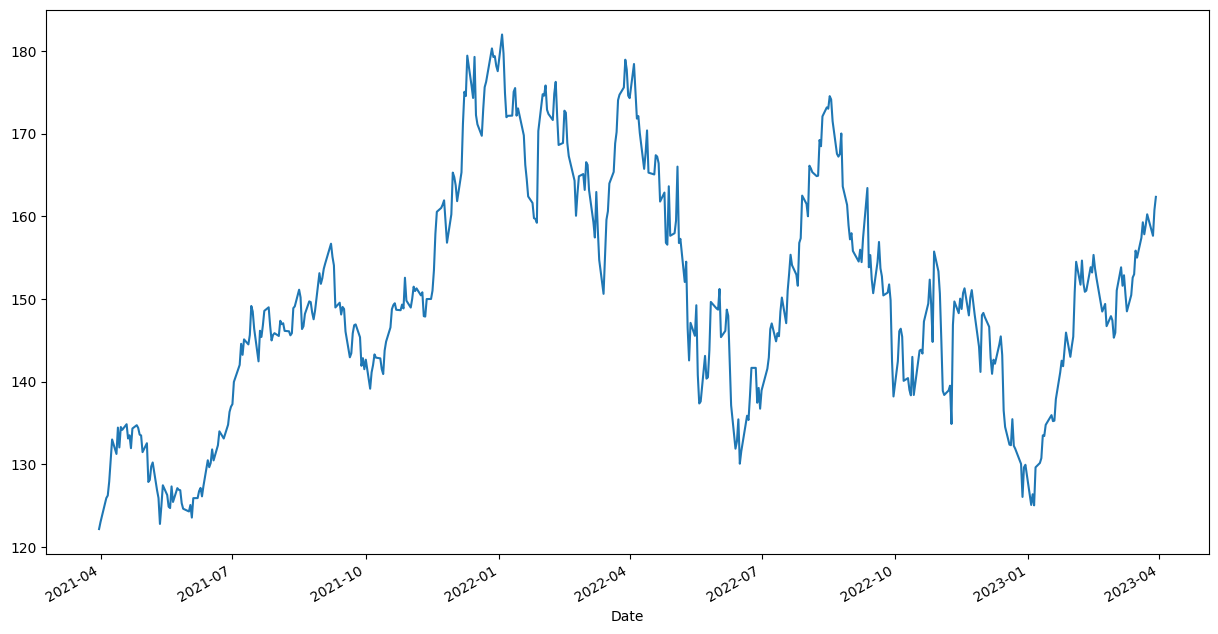

In [47]:
df['close'].plot(figsize = (15, 8))
plt.grid()
plt.ylabel("Price")
plt.show()

NameError: name 'plt' is not defined

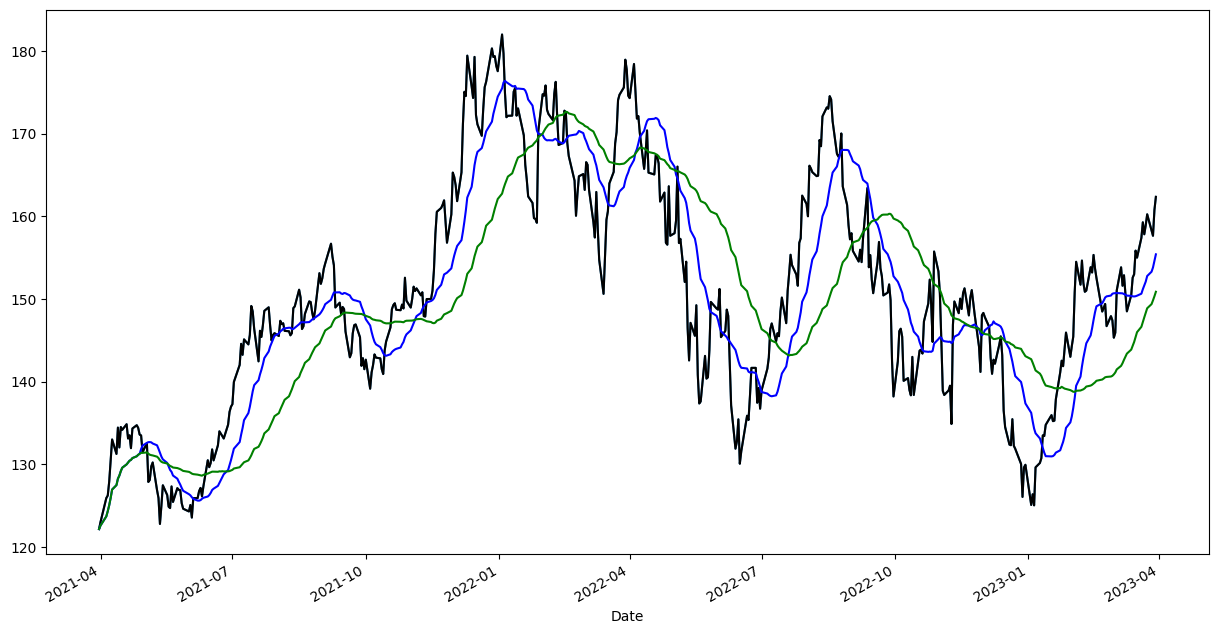

In [48]:
df['close'].plot(figsize = (15, 8))

# plot close price, short-term and long-term moving averages 
df['close'].plot(color = 'k', label= 'Close Price') 
df['20_SMA'].plot(color = 'b',label = '20-day SMA') 
df['50_SMA'].plot(color = 'g', label = '50-day SMA')
# plot 'buy' signals
plt.plot(df[df['Position'] == 1].index, 
         df['20_SMA'][df['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(df[df['Position'] == -1].index, 
         df['20_SMA'][df['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('APPL', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

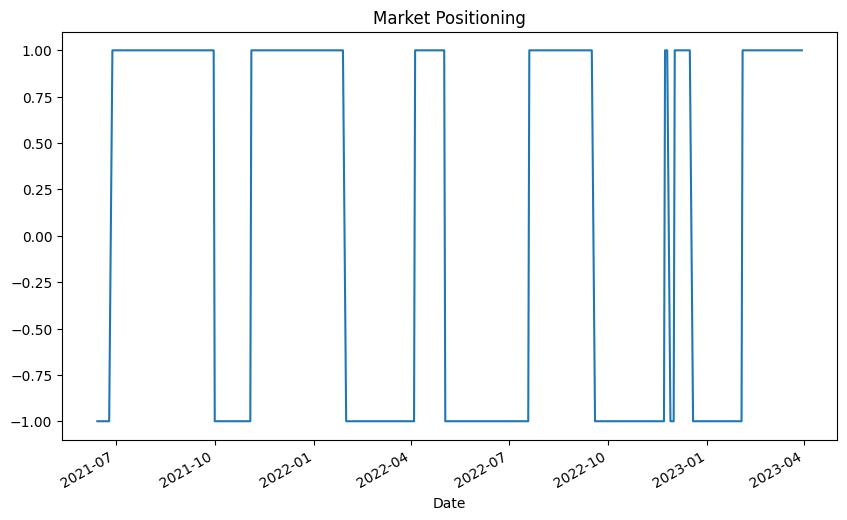

In [49]:
df2.dropna(inplace=True)
df2['Position_alt'].plot(ylim=[-1.1, 1.1],
                               title='Market Positioning',
                               figsize=(10, 6));

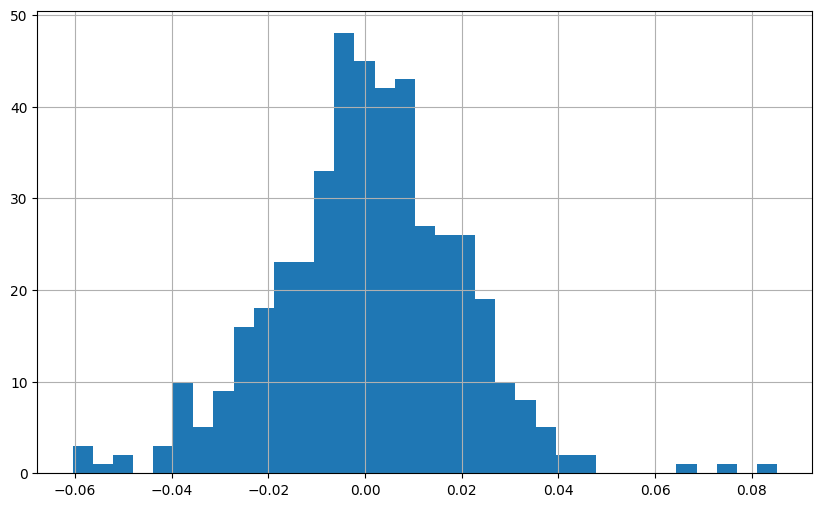

In [50]:
df2['returns'] = np.log(df2['close'] / df2['close'].shift(1))
df2['returns'].hist(bins=35, figsize=(10, 6));

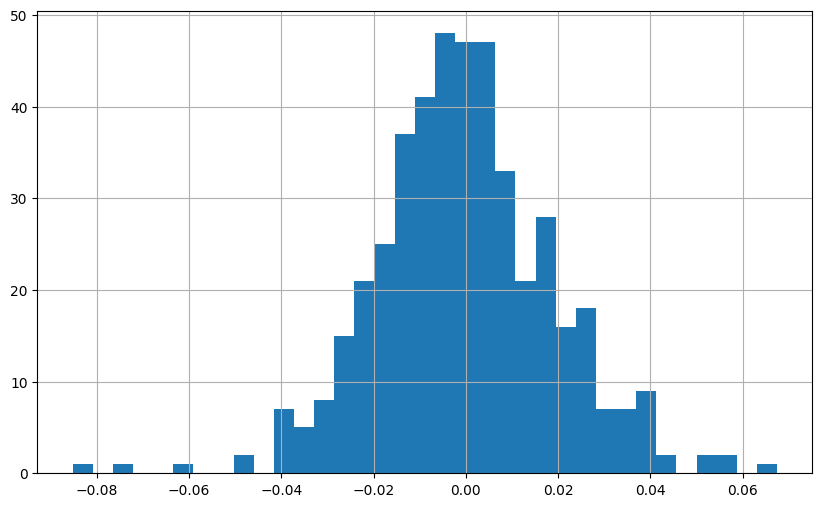

In [51]:
df2['strategy'] = df2['Position_alt'].shift(1) * df2['returns']
df2['strategy'].hist(bins=35, figsize=(10, 6));

In [52]:
df2[['returns', 'strategy']].sum()
df2[['returns', 'strategy']].sum().apply(np.exp)

AAPL.O
returns     1.244329
strategy    0.823678
dtype: float64

In [8]:
df['PLUS_DM'] = talib.PLUS_DM(df.high, df.low, timeperiod=10)
df['MINUS_DM'] = talib.MINUS_DM(df.high, df.low, timeperiod=10)

NameError: name 'talib' is not defined

In [47]:
df

AAPL.O,high,low,close,PLUS_DM,MINUS_DM
Date,,,,,
2017-03-27,35.305,34.655,35.22,NaN,NaN
2017-03-28,36.01,35.155,35.95,NaN,NaN
2017-03-29,36.1225,35.7975,36.03,NaN,NaN
2017-03-30,36.125,35.875,35.9825,NaN,NaN
2017-03-31,36.0675,35.7525,35.915,NaN,NaN
...,...,...,...,...,...
2022-03-17,161.0,157.63,160.62,9.320579,14.957475
2022-03-18,164.48,159.76,163.98,11.868521,13.461727
2022-03-21,166.35,163.015,165.38,12.551669,12.115554


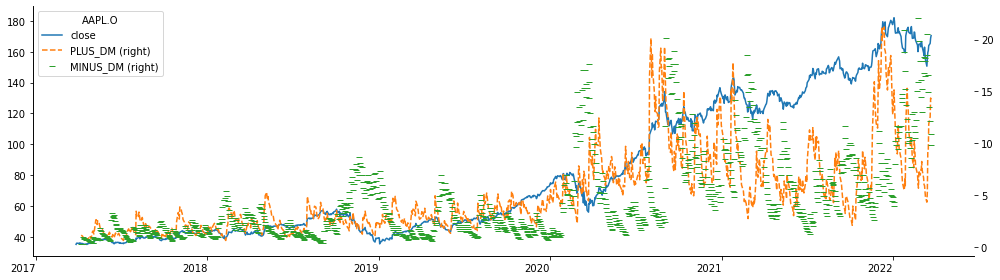

In [46]:
ax = df[['close', 'PLUS_DM', 'MINUS_DM']].plot(figsize=(14, 4),
                                               secondary_y=[
                                                   'PLUS_DM', 'MINUS_DM'],
                                               style=['-', '--', '_'],
                                              rot=0)
ax.set_xlabel('')
sns.despine()
plt.tight_layout()

In [21]:
df

AMXL.MX,high,low,close,PLUS_DM,MINUS_DM
Date,,,,,
2017-03-24,13.39,13.21,13.32,NaN,NaN
2017-03-27,13.59,13.19,13.56,NaN,NaN
2017-03-28,13.71,13.46,13.68,NaN,NaN
2017-03-29,13.9,13.56,13.76,NaN,NaN
2017-03-30,13.75,13.41,13.53,NaN,NaN
...,...,...,...,...,...
2022-03-15,19.93,19.51,19.81,1.032366,0.766625
2022-03-16,20.25,19.76,20.1,1.249129,0.689963
2022-03-17,20.55,20.01,20.38,1.424216,0.620966


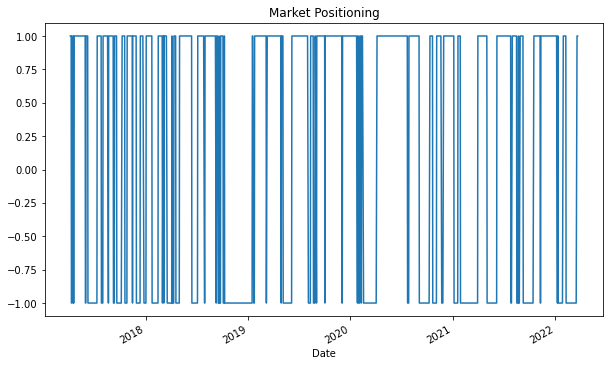

In [48]:
df['position'] = np.where(df['PLUS_DM'] > df['MINUS_DM'], 1, -1)
df.dropna(inplace=True)
df['position'].plot(ylim=[-1.1, 1.1],
                               title='Market Positioning',
                               figsize=(10, 6));

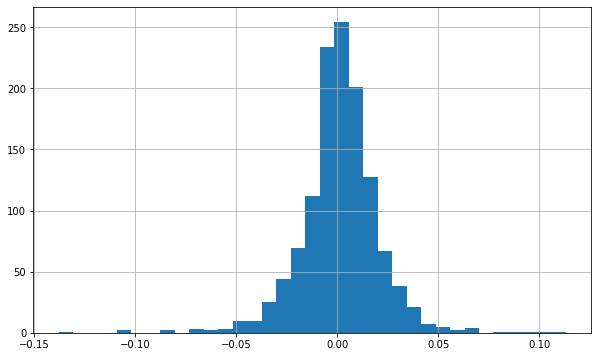

In [50]:
df['returns'] = np.log(df['close'] / df['close'].shift(1))
df['returns'].hist(bins=35, figsize=(10, 6));

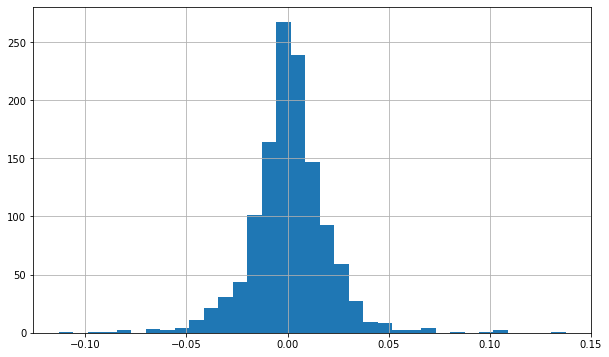

In [51]:
df['strategy'] = df['position'].shift(1) * df['returns']
df['strategy'].hist(bins=35, figsize=(10, 6));

In [52]:
df[['returns', 'strategy']].sum()
df[['returns', 'strategy']].sum().apply(np.exp)

AAPL.O
returns     4.756383
strategy    3.127561
dtype: float64

In [53]:
np.cumsum(df['returns'])

Date
2017-04-07         NaN
2017-04-10   -0.001187
2017-04-11   -0.012001
2017-04-12   -0.010802
2017-04-13   -0.016105
                ...   
2022-03-17    1.500116
2022-03-18    1.520819
2022-03-21    1.529321
2022-03-22    1.549908
2022-03-23    1.559488
Name: returns, Length: 1249, dtype: object

In [54]:
df['returns_cs'] = np.cumsum(df['returns'])
df['strategy_cs'] = np.cumsum(df['strategy'])


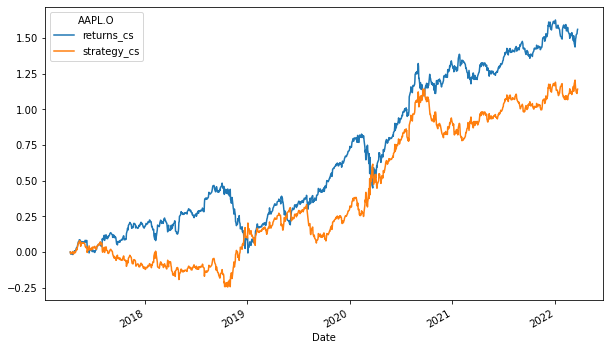

In [55]:
df[['returns_cs', 'strategy_cs']].plot(figsize=(10, 6));